In [1]:
import stella
import numpy as np
import matplotlib.pyplot as plt

/Users/azib/micromamba/envs/nets2/lib/python3.8/site-packages/lightkurve/config/__init__.py:119: UserWarning: The default Lightkurve cache directory, used by download(), etc., has been moved to /Users/azib/.lightkurve/cache. Please move all the files in the legacy directory /Users/azib/.lightkurve-cache to the new location and remove the legacy directory. Refer to https://docs.lightkurve.org/reference/config.html#default-cache-directory-migration for more information.
  warnings.warn(


In [2]:
exoplanets = stella.FlareDataSet(fn_dir='/Users/azib/Documents/open_source/nets2/models/exoplanets1k/',
                         catalog='/Users/azib/Documents/open_source/nets2/catalogs/exoplanets1k.txt',cadences=168,training=0.8,validation=0.1,frac_balance=0.5)

Reading in training set files.


100%|██████████████| 999/999 [00:00<00:00, 4348.17it/s]

999 positive classes
1540 negative classes
65.0% class imbalance



In [3]:
fbinaries = stella.FlareDataSet(fn_dir='/Users/azib/Documents/open_source/nets2/models/binaries1k/',
                         catalog='/Users/azib/Documents/open_source/nets2/catalogs/fakebinaries1k.txt',cadences=168,training=0.8,validation=0.1,frac_balance=0.65)

Reading in training set files.


100%|████████████| 1000/1000 [00:00<00:00, 4426.11it/s]

1000 positive classes
1060 negative classes
94.0% class imbalance



In [4]:
rbinaries = stella.FlareDataSet(fn_dir='/Users/azib/Documents/open_source/nets2/models/binaries-s7/',
                         catalog='/Users/azib/Documents/open_source/nets2/catalogs/binaries-catalog-s7.txt',cadences=168,training=0.65,validation=0.1,frac_balance=1)

Reading in training set files.


100%|██████████████| 231/231 [00:00<00:00, 2093.40it/s]

2600 positive classes
0 negative classes
Division by zero error. Cannot calculate class imbalance.


In [5]:
ds = stella.FlareDataSet(fn_dir='/Users/azib/Documents/open_source/nets2/models/comets5k/',
                         catalog='/Users/azib/Documents/open_source/nets2/catalogs/comets.txt',cadences=168,training=0.8,validation=0.1,merge_datasets=True,frac_balance=0.7, other_datasets = [exoplanets,fbinaries,rbinaries],other_datasets_labels = [2,3,4])

Reading in training set files.


100%|████████████| 5084/5084 [00:01<00:00, 4162.71it/s]


5013 positive classes
4741 negative classes
106.0% class imbalance



---

In [6]:
cnn = stella.ConvNN(output_dir='/Users/azib/Documents/open_source/nets2/cnn-models/',ds=ds)#,layers=layers)

---

## Injected into real lightcurves

## Main loop to create grid

Looping (and looping) over skewness/sigma with SNR 5 to show where if the CNN is having > 90% probability it capturing some feature of the exocomet.

### itertools product method

In [7]:
# import os
# import re
# import numpy as np
# import matplotlib.pyplot as plt
# from glob import glob
# from itertools import product
# from multiprocessing import Pool
# from functools import partial

# def process_folder(base_dir, skew, duration):
#     folder_pattern = f'injected-skew_{skew}-duration-{duration:.2f}-snr-5'
#     files = glob(os.path.join(base_dir, folder_pattern, '*'))
    
#     if not files:
#         return 0
    
#     labels = []
#     target_time = 1496.5
#     duration_days = 0.2
    
#     for file in files[:50]:
#         try:
#             time, flux, err, model = np.load(file, allow_pickle=True)
            
#             # CNN prediction (replace with your actual CNN prediction code)
#             predictions = cnn_predict(time, flux, err)
            
#             maxi = np.max(predictions)
#             label = 1 if maxi > 0.9 else 0
#             labels.append(label)
            
#         except Exception as e:
#             continue
    
#     return np.mean(labels) if labels else 0

# def main():
#     base_dir = '../exo9/'
#     folders = [f for f in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, f))]
    
#     pattern = re.compile(r'injected-skew_(?P<skew>-?\d+(\.\d+)?)-duration-(?P<duration>\d+\.\d+)-snr-5')
    
#     skew_values = sorted(set(int(pattern.search(f).group('skew')) for f in folders if pattern.search(f)))
#     duration_values = sorted(set(float(pattern.search(f).group('duration')) for f in folders if pattern.search(f)))
    
#     recovery_grid = np.zeros((len(duration_values), len(skew_values)))
    
#     with Pool() as pool:
#         process_func = partial(process_folder, base_dir)
#         results = pool.starmap(process_func, product(skew_values, duration_values))
    
#     recovery_grid = np.array(results).reshape(len(duration_values), len(skew_values))
    
#     plt.figure(figsize=(10, 8))
#     plt.imshow(recovery_grid * 100, 
#                extent=[skew_values[0] - 0.5, skew_values[-1] + 0.5, duration_values[0] / 2, duration_values[-1] * 2], 
#                aspect='auto', origin='lower', cmap='viridis')
#     plt.colorbar(label='Percentage of Recovered Injections')
#     plt.xlabel('Skewness')
#     plt.ylabel('Sigma')
#     plt.title('2D Histogram of Recovered CNN Injections')
#     plt.yscale('log')
#     plt.show()



100%|███████████████████████████████████████████| 1/1 [00:00<00:00,  1.50it/s]


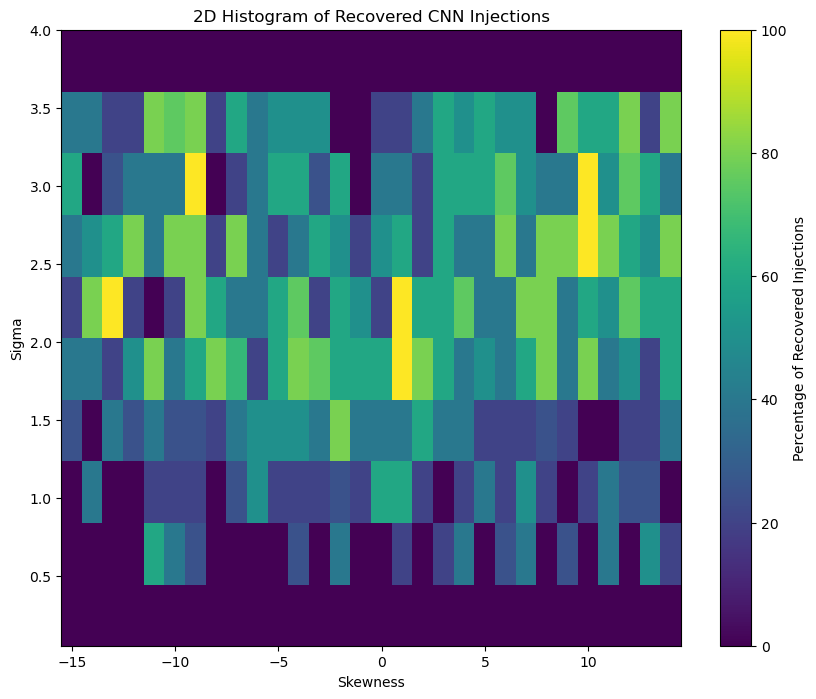

In [9]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

# Define the base directory containing the folders
base_dir = '../exo9/'

# Get the list of all folders
folders = [f for f in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, f))]

# Initialize lists to store unique skew and duration values
skew_values = []
duration_values = []

# Define a regex pattern to extract skew and duration from folder names
pattern = re.compile(r'injected-skew_(?P<skew>-?\d+(\.\d+)?)-duration-(?P<duration>\d+\.\d+)-snr-5')

# Extract skew and duration values from folder names
for folder in folders:
    match = pattern.search(folder)
    if match:
        skew = int(match.group('skew'))
        duration = float(match.group('duration'))
        if skew not in skew_values:
            skew_values.append(skew)
        if duration not in duration_values:
            duration_values.append(duration)

# Sort the values
skew_values.sort()
duration_values.sort()

# Initialize a 2D array to store the fraction of recovered injections
recovery_grid = np.zeros((len(duration_values), len(skew_values)))  # Note the switched dimensions

# Define the target time and duration in days for analysis
target_time = 1496.5
duration_days = 0.2  # This is the total duration of the window

# Loop through each combination of skewness and duration
for i, duration in enumerate(duration_values):  # Note the switched order of iteration
    for j, skew in enumerate(skew_values):
        folder_pattern = f'injected-skew_{skew}-duration-{duration}-snr-5'
        files = glob(os.path.join(base_dir, folder_pattern, '*'))
        
        
        if not files:
            continue

        labels = []
        ids = []
        
        for file in files[0:5]:
            try:
                # Load the data
                time, flux, err, model = np.load(file, allow_pickle=True)

                # Make predictions using the CNN
                cnn.predict(modelname='/Users/azib/Documents/open_source/nets2/cnn-models/ensemble_s0002_i0200_b0.7.h5',
                            times=time,
                            fluxes=flux,
                            errs=err)
                
                # Find the indices in cnn.predict_time around target_time within the specified duration
                indices = np.where((cnn.predict_time[0] >= target_time - duration_days / 2) & (cnn.predict_time[0] <= target_time + duration_days / 2))[0]
                
                # Calculate the average probability in this range

                maxi = np.max(cnn.predictions[0])
                label = 1 if maxi > 0.9 else 0
                
                # if len(indices) > 0:
                #     maxi = np.max(cnn.predictions[0][indices])
                #     #avg_prob = np.mean(cnn.predictions[0][indices])
                #     label = 1 if maxi > 0.9 else 0
                # else:
                #     # If no indices found in the range, find the closest index to the target time
                #     closest_index = np.argmin(np.abs(cnn.predict_time[0] - target_time))
                #     maxi = cnn.predictions[0][closest_index]
                #     label = 1 if maxi > 0.9 else 0

                labels.append(label)

                # # Plotting the results (optional)
                # fig, ax = plt.subplots(1, 2, figsize=(14, 3), sharey=True, sharex=True)

                # sc = ax[0].scatter(cnn.predict_time[0], cnn.predict_flux[0],
                #                    c=cnn.predictions[0], vmin=0, vmax=1, s=5)
                # ax[0].set_xlabel('Time [BJD-2457000]')
                # ax[0].set_ylabel('Normalised Flux')
                # ax[0].set_title('CNN Predictions')
                # #ax[0].axvline(target_time, linestyle='--',zorder=1,color='red')
                # #ax[0].axvline(target_time + duration_days / 2, linestyle='--', c='red')
                # cbar = fig.colorbar(sc, ax=ax[0], label='Probability of Exocomet')

                # ax[1].scatter(cnn.predict_time[0], model, s=5)
                # ax[1].set_title(f'Model: Skew {skew}, Duration {duration}')
                # #ax[1].axvline(target_time, linestyle='--',zorder=1,color='red')
                # #ax[1].axvline(target_time + duration_days / 2, linestyle='--', c='red')

                # plt.show()
                # plt.close()

            except Exception as e:
                continue
        
        # Calculate the fraction of recovered injections
        if len(labels) > 0:
            # Number of labels that are 1 (recovered)
            num_recovered = sum(labels)
            # Total number of labels
            total_labels = len(labels)
            # Fraction of recovered labels
            recovery_fraction = num_recovered / total_labels
        else:
            recovery_fraction = 0
        
        # Store the fraction in the 2D grid
        recovery_grid[i, j] = recovery_fraction

# Convert the fractions to percentages for plotting
recovery_grid_percentage = recovery_grid * 100

plt.figure(figsize=(10, 8))
plt.imshow(recovery_grid_percentage, 
           extent=[skew_values[0] - 0.5, skew_values[-1] + 0.5, duration_values[0] / 2, duration_values[-1] * 2], 
           aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(label='Percentage of Recovered Injections')
plt.xlabel('Skewness')
plt.ylabel('Sigma')
plt.title('2D Histogram of Recovered CNN Injections')
plt.show()
#plt.yscale('log')  # Set y
# # Annotate the heatmap with the percentages
# for i in range(len(duration_values)-1):
#     for j in range(len(skew_values)-1):
#         pval = np.mean(duration_values[[i, i + 1]])
#         rval = np.mean(skew_values[[j, j + 1]])
#         hval = recovery_grid[i, j]
#         plt.annotate(
#             f"{hval:.4f}",
#             xy=(pval, rval),  # multiply hval by 100 here for percentage
#             ha="center",
#             va="center",
#             size=14,
#         )


# plt.show()


In [20]:
num_recovered

21

In [51]:
lc = np.load('../exo7/injected-skew_-1-duration-0.74-snr-9/exocomet_model_0_sector07.npy')

In [52]:
def skewed_gaussian(x,alpha,t0,sigma,A):
    from scipy.stats import skewnorm
    """Creates a skewned Gaussian model transit.
    
    Parameters:
        x: Flux array.
        A: Amplitude of the Gaussian.
        t0: Mean of the Gaussian.
        sigma: Standard deviation of the Gaussian.
        alpha: Skewness parameter (positive for right-skewed, negative for left-skewed).

    Returns:
        y: The value of the skewed Gaussian at each input data point x.
    
    
    """
    pdf = skewnorm.pdf(x, alpha, loc=t0, scale=sigma)
    normalized_pdf = pdf / pdf.max()  # Normalize so the peak is 1
    return 1 - A * normalized_pdf  # Subtract from 1 to create a dip

In [53]:
lc[0]

array([1491.66062029, 1491.68145422, 1491.70228814, ..., 1515.99429139,
       1516.01512436, 1516.07762427])

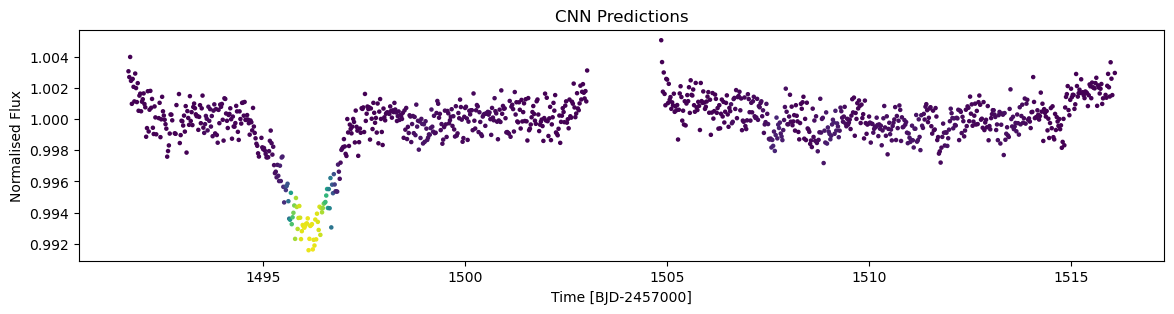

In [64]:
cnn.predict('/Users/azib/Documents/open_source/nets2/cnn-models/ensemble_s0002_i0200_b0.7.h5',lc[0],lc[1],lc[2])
# Plotting the results (optional)
fig, ax = plt.subplots(1, 1, figsize=(14, 3), sharey=True, sharex=True)

plt.scatter(cnn.predict_time[0], cnn.predict_flux[0],
                   c=cnn.predictions[0], vmin=0, vmax=1, s=5)
plt.xlabel('Time [BJD-2457000]')
plt.ylabel('Normalised Flux')
plt.title('CNN Predictions')
#ax[0].axvline(target_time, linestyle='--',zorder=1,color='red')
#ax[0].axvline(target_time + duration_days / 2, linestyle='--', c='red')
plt.colorbar(sc, label='Probability of Exocomet')



Multiprocess the top by considering cartesian product of two inputs sigma and skew